**Aplicación en Python: Análisis y Predicción del Precio Spot Energético**


**By: Jhara Castañez Martinez**

**Objetivo General**

Desarrollar una aplicación en Python que permita adquirir, analizar, visualizar y predecir el comportamiento del precio spot de la energía eléctrica en Colombia, facilitando la comprensión de la dinámica del mercado energético y su comparación con otros mercados internacionales.

**Objetivos Específicos**

- Adquisición de Datos:
Implementar funciones que obtengan datos históricos del precio spot de Colombia (via API de XM, datos csv o web scraping) y de mercados internacionales seleccionados, así como variables relevantes como niveles de embalses y precios de combustibles.

- Análisis y Visualización de Datos:
Procesar los datos mediante pandas y generar gráficos de series de tiempo, correlaciones y comparaciones entre países usando matplotlib y seaborn.

- Modelado Predictivo:
Diseñar e implementar un modelo de predicción de precios usando técnicas básicas de machine learning (scikit-learn), evaluando su desempeño con métricas como RMSE y R².

**Metodología**

La metodología del desarrollo de la aplicación en Python se centra en integrar la adquisición, el análisis y la predicción de datos del precio spot de la energía eléctrica en Colombia y otros mercados internacionales. Inicialmente, se recopilan datos históricos del precio de la energía y de variables relevantes que influyen en su formación, como niveles de embalses y precios de combustibles. Estos datos se procesan y limpian para asegurar su consistencia y facilitar su análisis. Posteriormente, se realizan análisis exploratorios y visualizaciones que permiten identificar patrones, tendencias y comparaciones internacionales de la volatilidad de los precios. Finalmente, se implementa un modelo predictivo básico que, a partir de los datos históricos y variables asociadas, estima precios futuros, evaluando su desempeño y limitaciones. Todo este proceso se integra en un entorno Python organizado y documentado, que combina análisis, visualización y predicción para generar resultados interpretables y aplicables al estudio del mercado energético.

**Utilización de Datos**

Los conjuntos de datos utilizados en este proyecto se construyeron con base en tendencias reales del año (2024) y reportes de fuentes oficiales del sector energético. Con el fin de garantizar una estructura homogénea entre países y facilitar la comparación.

**Fuentes consultadas** :

CENACE (México)

Coordinador Eléctrico Nacional (Chile)

CAMMESA (Argentina)

REE / OMIE (España)

Agencia Internacional de Energía (IEA)

En el siguiente enlace se encuentra una carpeta que contiene los archivos necesarios para la utilización de la aplicación:
Carpeta DATOS – PAISES:
https://drive.google.com/drive/folders/1xw7xdTPep4BBMu7ufOdbT4pMVd-EhmDE

Esta carpeta reúne los conjuntos de datos empleados en el análisis y la predicción de precios energéticos. Dentro de ella se incluyen los archivos correspondientes a cada país y las variables asociadas al mercado eléctrico.


**Instalación e Importación de Librerías Aplicadas**

Se instalan y cargan las librerías necesarias para el análisis de datos, visualización y modelado (pandas, numpy, matplotlib, seaborn y scikit-learn).
Además, se ajusta el estilo de los gráficos y el tamaño de las figuras para mejorar su presentación.

In [ ]:
!pip install seaborn scikit-learn matplotlib pandas requests --quiet

from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests, io, zipfile, json
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


**Análisis de Datos energéticos por país**

Este bloque realiza un análisis exploratorio del precio spot de electricidad para un país específico. Primero, se carga y limpia el archivo CSV del país, normalizando columnas y fechas.

Luego se visualiza la evolución temporal del precio spot y se calcula la volatilidad anual mediante la desviación estándar móvil de 365 días, mostrando cómo cambia la variabilidad del mercado a lo largo del tiempo.

Además, se generan tablas resumen y una visualización interactiva con Plotly, que permite explorar los precios y la volatilidad de manera dinámica. Este análisis permite identificar periodos de alta variabilidad y patrones de comportamiento del mercado eléctrico.

 Sube el archivo CSV del país que deseas analizar


Saving Colombia Predicción.csv to Colombia Predicción (11).csv
 Archivo cargado: Colombia Predicción (11).csv


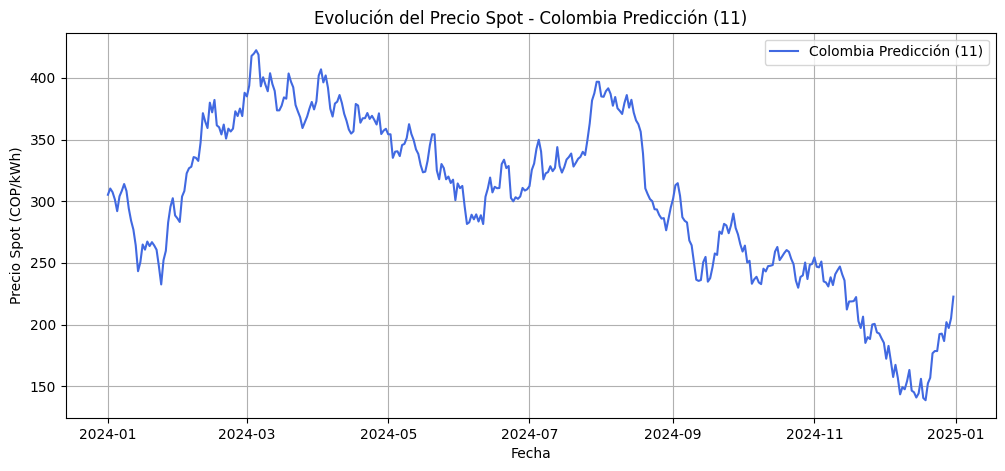

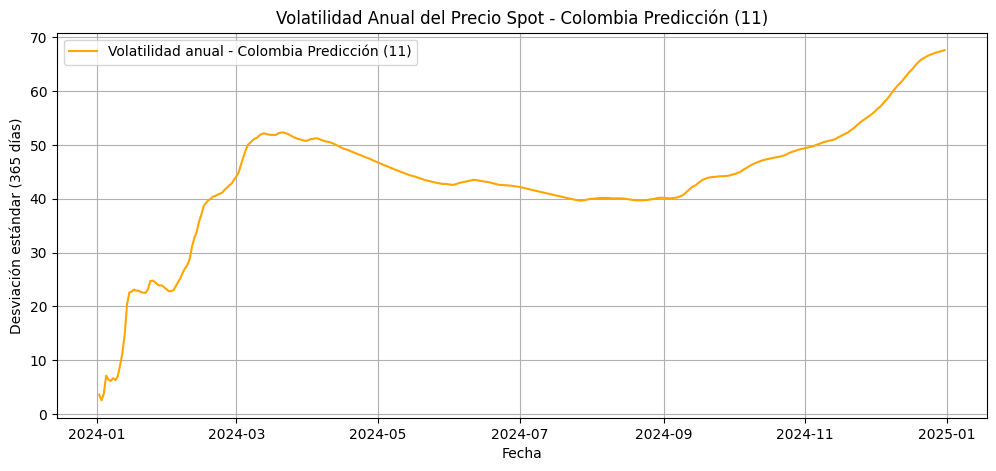


 Tabla resumen de los datos graficados:


,País,Fecha,Valor,Volatilidad
356,Colombia Predicción (11),2024-12-22 00:00:00,176.717856,66.140289
357,Colombia Predicción (11),2024-12-23 00:00:00,178.541000,66.381376
358,Colombia Predicción (11),2024-12-24 00:00:00,178.519168,66.618522
359,Colombia Predicción (11),2024-12-25 00:00:00,192.238971,66.784247
360,Colombia Predicción (11),2024-12-26 00:00:00,192.639318,66.945384
361,Colombia Predicción (11),2024-12-27 00:00:00,186.620908,67.131940
362,Colombia Predicción (11),2024-12-28 00:00:00,201.946912,67.247392
363,Colombia Predicción (11),2024-12-29 00:00:00,197.203964,67.380766
364,Colombia Predicción (11),2024-12-30 00:00:00,205.086883,67.479601
365,Colombia Predicción (11),2024-12-31 00:00:00,222.624882,67.606692


,Fecha,Valor,Embalses,Combustibles,Precipitaciones,Volatilidad,País
0,2024-01-01,305.216618,80.064852,70.032486,16.909274,NaN,Colombia Predicción (11)
1,2024-01-02,310.277149,78.617960,69.493561,0.783774,3.578336,Colombia Predicción (11)
2,2024-01-03,307.308117,77.712378,69.461167,10.459339,2.542915,Colombia Predicción (11)
3,2024-01-04,301.378894,77.944401,69.097072,1.539589,3.740112,Colombia Predicción (11)
4,2024-01-05,291.901159,78.056498,69.712545,6.665513,7.106481,Colombia Predicción (11)
5,2024-01-06,303.967461,77.764555,69.424192,8.933409,6.363622,Colombia Predicción (11)
6,2024-01-07,308.405475,78.034269,69.783585,16.052768,6.116348,Colombia Predicción (11)
...,...,...,...,...,...,...,...
359,2024-12-25,192.238971,82.532040,62.899085,30.354558,66.784247,Colombia Predicción (11)
360,2024-12-26,192.639318,81.437757,62.503762,45.892725,66.945384,Colombia Predicción (11)


In [2]:

# ANÁLISIS DE PRECIOS Y VOLATILIDAD DEL MERCADO ELÉCTRICO

# Librerías
import plotly.express as px
from IPython.display import display, HTML


# Carga de datos

print(" Sube el archivo CSV del país que deseas analizar")
uploaded = files.upload()

for name, content in uploaded.items():
    pais_nombre = name.replace(".csv", "")
    df_col = pd.read_csv(io.BytesIO(content))
    print(f" Archivo cargado: {name}")
    break

# Limpieza y formato de datos

# Limpieza de columnas
df_col.columns = [c.strip().replace("\ufeff", "") for c in df_col.columns]

# Normalizar nombre de la columna de valor
if "Valor" not in df_col.columns:
    for c in ["Precio", "precio", "PPBO", "Price"]:
        if c in df_col.columns:
            df_col.rename(columns={c: "Valor"}, inplace=True)
            break

# Convertir fechas
df_col["Fecha"] = pd.to_datetime(df_col["Fecha"], errors="coerce")
df_col = df_col.dropna(subset=["Fecha", "Valor"])


# Gráfica del precio spot

plt.figure(figsize=(12, 5))
plt.plot(df_col["Fecha"], df_col["Valor"], label=pais_nombre, color="royalblue")
plt.title(f"Evolución del Precio Spot - {pais_nombre}")
plt.xlabel("Fecha")
plt.ylabel("Precio Spot (COP/kWh)")
plt.legend()
plt.grid(True)
plt.show()


# Volatilidad anual (365 DÍAS)


df_col["Volatilidad"] = df_col["Valor"].rolling(window=365, min_periods=1).std()

plt.figure(figsize=(12, 5))
plt.plot(df_col["Fecha"], df_col["Volatilidad"], color="orange",
         label=f"Volatilidad anual - {pais_nombre}")
plt.title(f"Volatilidad Anual del Precio Spot - {pais_nombre}")
plt.xlabel("Fecha")
plt.ylabel("Desviación estándar (365 días)")
plt.legend()
plt.grid(True)
plt.show()

# Tabla de registros


df_col["País"] = pais_nombre
resumen = df_col[["País", "Fecha", "Valor", "Volatilidad"]].tail(10)

print("\n Tabla resumen de los datos graficados:")
display(
    resumen.style
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'),
                                     ('background-color', '#e0f7fa'),
                                     ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '6px')]}
    ])
)

# Tabla interactiva

# Mostrar tabla interactiva con Plotly (permite ordenar, buscar, hacer zoom, etc.)
fig = px.scatter(
    df_col,
    x="Fecha",
    y="Valor",
    color_discrete_sequence=["royalblue"],
    hover_data=["Volatilidad", "País"],
    title=f" Exploración Interactiva de Precios y Volatilidad - {pais_nombre}"
)
fig.update_traces(marker=dict(size=6))
fig.show()

# Si quieres mostrar toda la tabla con scroll:
display(HTML(df_col.to_html(max_rows=15, justify='center')))


**Análisis de los resultados:** Las gráficas generadas muestran la evolución del precio spot de la energía en Colombia junto con su nivel de volatilidad anual. En la primera parte del análisis se observa cómo el precio fluctúa de manera constante a lo largo del tiempo, con periodos de incrementos y descensos que reflejan la dinámica del mercado eléctrico nacional. Estas variaciones permiten identificar momentos de mayor estabilidad o de alta inestabilidad en los precios, posiblemente influenciados por factores como la oferta energética, la demanda, el clima o los costos de los combustibles.

Además, el código incluye una gráfica interactiva, donde cada punto representa el valor del precio spot en una fecha determinada. Al hacer clic o pasar el cursor sobre un punto, se muestra información detallada como la fecha exacta, el valor del precio, la volatilidad calculada en ese momento y el nombre del país analizado. Esta función facilita la exploración precisa de los datos y permite detectar comportamientos puntuales o tendencias locales dentro del conjunto histórico.

Por otro lado, el programa genera tablas de datos complementarias que presentan los últimos registros del análisis. Estas tablas resumen los valores más recientes de precios y volatilidad, permitiendo contrastar visualmente los resultados de las gráficas con los datos numéricos.

**Función para Generar Datos Simulados de Energia para un País**

En esta sección se crean datos simulados diarios de energía eléctrica para un país específico. Se incluyen variables clave que influyen en el precio de la energía.

- Precio de energía (Valor): fluctuaciones diarias simuladas con base en un precio inicial y ruido acumulado.

- Embalses: niveles de agua en represas, que afectan la generación hidroeléctrica.

- Combustibles: precio simulado de combustibles fósiles, que impacta la generación térmica.

- Precipitaciones: lluvia diaria simulada, que puede afectar la disponibilidad de agua y la producción hidroeléctrica.

El objetivo de esta simulación es permitir explorar patrones de relación entre el precio de la energía y variables clave, así como generar gráficos de evolución temporal para un análisis visual inicial.

In [ ]:
# Genera datos simulados diarios de energía para un país dado.

def generar_datos_pais(nombre, precio_base, start="2024-01-01", end="2024-12-31"):

    np.random.seed(abs(hash(nombre)) % 2**32)  # reproducible por país
    fechas = pd.date_range(start=start, end=end, freq="D")
    n = len(fechas)

    precio = precio_base + np.random.normal(0, 10, n).cumsum()
    embalses = np.clip(80 + np.random.normal(0, 5, n).cumsum()/10, 30, 100)
    combustibles = 70 + np.random.normal(0, 3, n).cumsum()/5
    precipitaciones = np.abs(np.sin(np.linspace(0, 6, n))*100 + np.random.normal(0, 12, n))

    df = pd.DataFrame({
        "Fecha": fechas,
        "Valor": precio,
        "Embalses": embalses,
        "Combustibles": combustibles,
        "Precipitaciones": precipitaciones,
        "País": nombre
    })

    print(f"\n Datos simulados generados para {nombre}.\n")
    display(df.head())

    return df


**Análisis Exploratorio de Precios de Energía**

Se realiza un análisis visual y estadístico del precio de energía y su relación con variables clave como Embalses, Combustibles y Precipitaciones:

- Se muestra una tabla de los primeros registros para revisar los datos cargados.

- Se grafica la evolución del precio por país para identificar tendencias y comparaciones.

- Se generan gráficas de relación precio vs variables, incluyendo correlaciones, para explorar posibles dependencias.

- Se crean gráficas individuales más compactas para resaltar patrones importantes de manera clara.

- Se imprime un resumen estadístico simple con promedio, rango y correlaciones.

 Sube tu archivo CSV para el análisis del predicción ...


Saving Colombia Predicción.csv to Colombia Predicción (1).csv
 TABLA DE DATOS GLOBAL (Primeras 10 filas):


,Fecha,Valor,Embalses,Combustibles,Precipitaciones,País
0,2024-01-01,305.216618,80.064852,70.032486,16.909274,Colombia predicción (1)
1,2024-01-02,310.277149,78.617960,69.493561,0.783774,Colombia predicción (1)
2,2024-01-03,307.308117,77.712378,69.461167,10.459339,Colombia predicción (1)
3,2024-01-04,301.378894,77.944401,69.097072,1.539589,Colombia predicción (1)
4,2024-01-05,291.901159,78.056498,69.712545,6.665513,Colombia predicción (1)
5,2024-01-06,303.967461,77.764555,69.424192,8.933409,Colombia predicción (1)
6,2024-01-07,308.405475,78.034269,69.783585,16.052768,Colombia predicción (1)
7,2024-01-08,313.917649,77.568671,69.488021,3.014207,Colombia predicción (1)
8,2024-01-09,308.287903,77.506960,69.663540,15.917166,Colombia predicción (1)
9,2024-01-10,294.126625,77.512349,69.575423,23.993550,Colombia predicción (1)


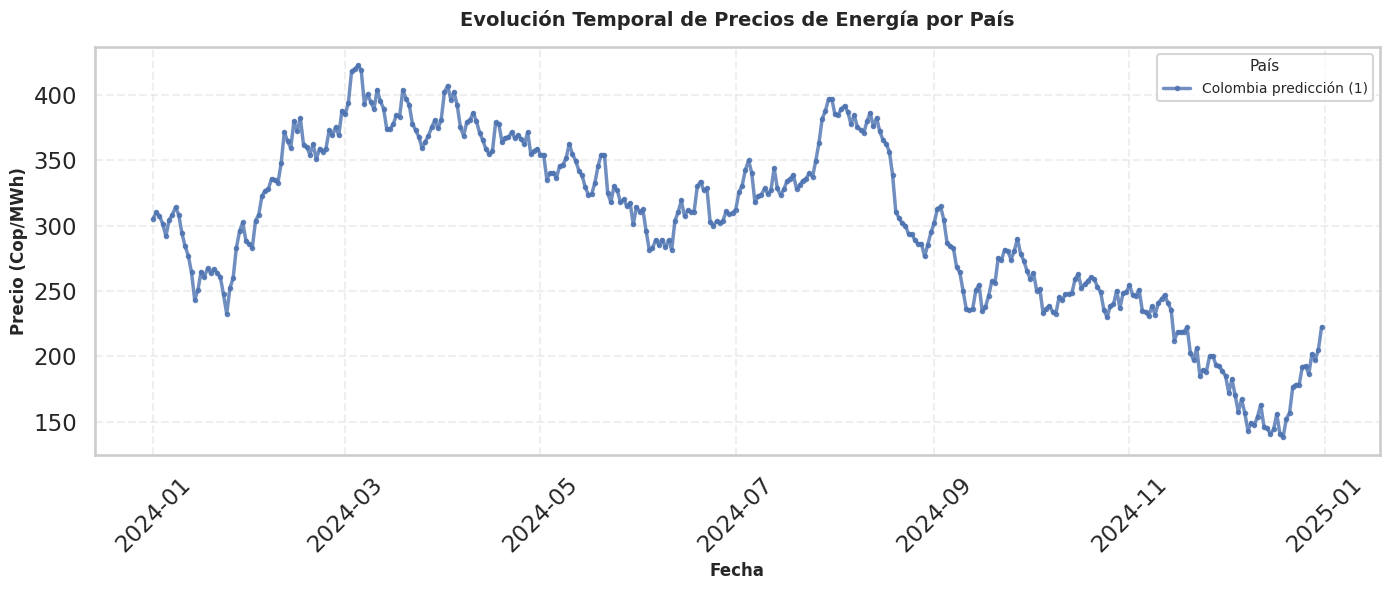

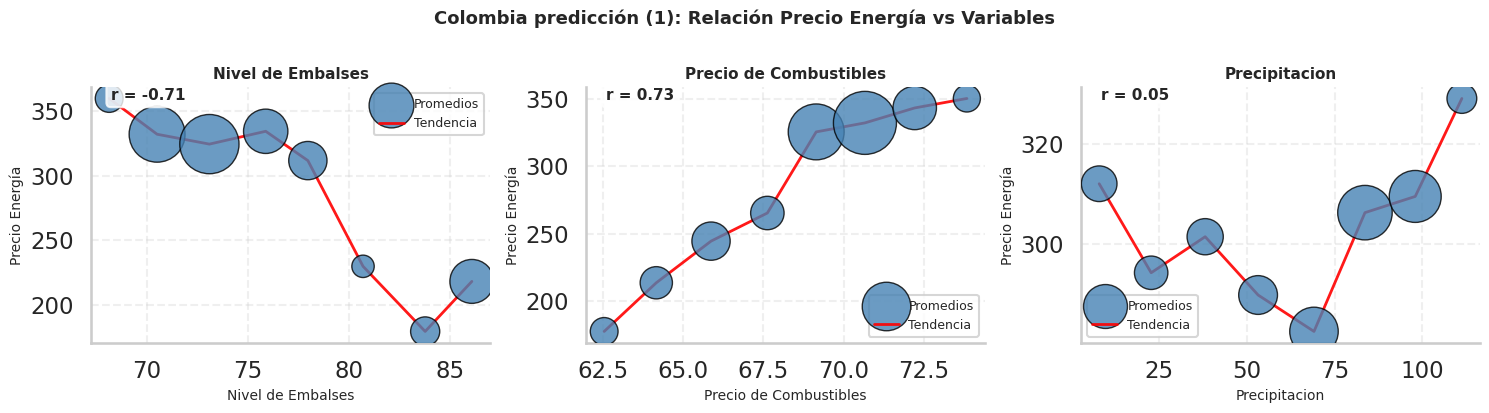


ANÁLISIS INDIVIDUAL POR VARIABLE


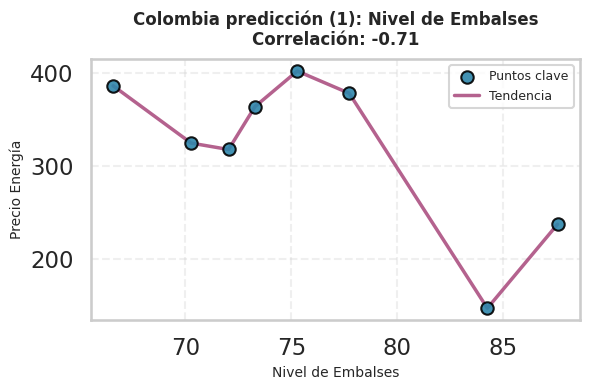

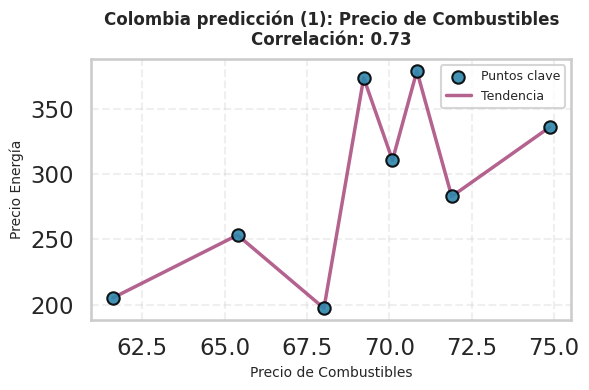

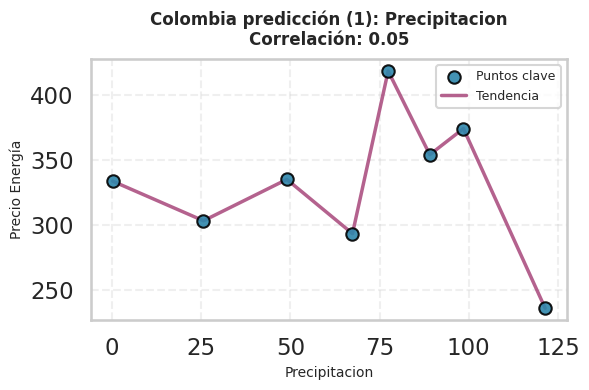


RESUMEN ESTADÍSTICO

Colombia predicción (1):
  Periodo: 2024-01-01 a 2024-12-31
  Precio promedio: $301.65
  Rango: $138.66 - $422.37
  Nivel de Embalses: r = -0.71
  Precio de Combustibles: r = 0.73
  Precipitacion: r = 0.05


In [18]:
#Análisis

# Líbrerias
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')  # Eliminar advertencias

sns.set(style="whitegrid", context="talk")
plt.rcParams['font.size'] = 10  # Reducir tamaño de fuente general


# Subir archivo CSV

print(" Sube tu archivo CSV para el análisis del predicción ...")
uploaded_files = files.upload()

dfs = {}

for filename, content in uploaded_files.items():
    df = pd.read_csv(pd.io.common.BytesIO(content))

    # Normalizar columnas
    df.columns = [c.strip().replace("\ufeff", "") for c in df.columns]
    if "Fecha" not in df.columns and "fecha" in df.columns:
        df.rename(columns={"fecha": "Fecha"}, inplace=True)
    if "Valor" not in df.columns:
        for c in ["Precio", "precio", "PPBO", "Price"]:
            if c in df.columns:
                df.rename(columns={c: "Valor"}, inplace=True)
                break

    df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")
    df = df.dropna(subset=["Fecha", "Valor"]).sort_values("Fecha").reset_index(drop=True)

    pais = filename.split('.')[0].capitalize()
    df["País"] = pais

    for var in ["Embalses", "Combustibles", "Precipitaciones"]:
        if var not in df.columns:
            df[var] = pd.NA

    dfs[pais] = df


# Datos

df_global = pd.concat(dfs.values(), ignore_index=True)
print(" TABLA DE DATOS GLOBAL (Primeras 10 filas):")
display(df_global.head(10))


# Gráfica de precio por país

plt.figure(figsize=(14, 6))  # Reducido de 16,8 a 14,6
for pais in df_global["País"].unique():
    df_pais = df_global[df_global["País"] == pais]
    plt.plot(df_pais["Fecha"], df_pais["Valor"],
             linewidth=2.5, alpha=0.8, marker='o', markersize=3,
             label=pais)

plt.title("Evolución Temporal de Precios de Energía por País",
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel("Fecha", fontsize=12, fontweight='bold')
plt.ylabel("Precio (Cop/MWh)", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(title="País", title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()


# Gráfica de variables - Tamaño reducido

variables = {
    "Embalses": "Nivel de Embalses",
    "Combustibles": "Precio de Combustibles",
    "Precipitaciones": "Precipitacion"
}

for pais, df in dfs.items():
    # Filtrar solo variables que tengan datos suficientes
    vars_con_datos = []
    for var in variables.keys():
        if df[var].notna().sum() >= 5:
            vars_con_datos.append(var)

    if not vars_con_datos:
        continue

    n_vars = len(vars_con_datos)
    fig, axes = plt.subplots(1, n_vars, figsize=(5*n_vars, 4))  # Reducido de 7,6 a 5,4
    if n_vars == 1:
        axes = [axes]

    fig.suptitle(f"{pais}: Relación Precio Energía vs Variables",
                fontsize=13, fontweight='bold', y=1.02)

    for i, var in enumerate(vars_con_datos):
        ax = axes[i]

        # Filtrar y ordenar datos válidos
        datos_validos = df.dropna(subset=[var, "Valor"]).sort_values(var)

        if len(datos_validos) < 5:
            ax.text(0.5, 0.5, f"Datos insuficientes\npara {variables[var]}",
                   ha='center', va='center', transform=ax.transAxes, fontsize=10)
            ax.set_title(variables[var], fontsize=11, fontweight='bold')
            continue

        # ESTRATEGIA: Agrupar en bins para reducir puntos pero mantener tendencia
        n_bins = min(8, len(datos_validos) // 2)

        if len(datos_validos) > 10:
            # Crear grupos/bins
            datos_validos = datos_validos.copy()
            datos_validos['grupo'] = pd.cut(datos_validos[var], bins=n_bins)

            # Calcular promedios por grupo
            datos_agrupados = datos_validos.groupby('grupo').agg({
                var: 'mean',
                'Valor': 'mean',
                'Fecha': 'count'
            }).reset_index()

            datos_agrupados = datos_agrupados.rename(columns={'Fecha': 'n_puntos'})
            datos_agrupados = datos_agrupados.sort_values(var)

            # Usar datos agrupados para el gráfico
            x_plot = datos_agrupados[var].values
            y_plot = datos_agrupados['Valor'].values
            sizes = datos_agrupados['n_puntos'].values * 20

            # Puntos principales
            scatter = ax.scatter(x_plot, y_plot,
                               s=sizes, alpha=0.8, color='steelblue',
                               edgecolors='black', linewidth=1,
                               label='Promedios', zorder=5)

            # Línea que conceta los puntos
            ax.plot(x_plot, y_plot,
                   color='red', linewidth=2, marker='',
                   linestyle='-', alpha=0.9,
                   label='Tendencia', zorder=4)

        else:
            # Si hay pocos datos, mostrar todos con línea conectada
            x_plot = datos_validos[var].values
            y_plot = datos_validos['Valor'].values

            # Puntos principales
            scatter = ax.scatter(x_plot, y_plot,
                               s=60, alpha=0.8, color='steelblue',
                               edgecolors='black', linewidth=1,
                               label='Datos', zorder=5)

            # Línea que conceta todos los puntos
            ax.plot(x_plot, y_plot,
                   color='red', linewidth=2, marker='',
                   linestyle='-', alpha=0.9,
                   label='Tendencia', zorder=4)

        # Calcular correlación
        correlacion = datos_validos[var].corr(datos_validos['Valor'])

        # Añadir texto con correlación
        ax.text(0.05, 0.95, f'r = {correlacion:.2f}',
               transform=ax.transAxes, fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
               zorder=6)

        ax.set_title(variables[var], fontsize=11, fontweight='bold')
        ax.set_xlabel(variables[var], fontsize=10)
        ax.set_ylabel("Precio Energía", fontsize=10)
        ax.grid(True, linestyle="--", alpha=0.3)
        ax.legend(fontsize=9, loc='best')

        # Mejorar estética
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


# Gráficas individuales pequeñas

print("\n" + "="*50)
print("ANÁLISIS INDIVIDUAL POR VARIABLE")
print("="*50)

for pais, df in dfs.items():
    for var, nombre in variables.items():
        datos_validos = df.dropna(subset=[var, "Valor"]).sort_values(var)

        if len(datos_validos) >= 5:
            plt.figure(figsize=(6, 4))  # Reducido de 10,6 a 6,4

            # Estrategia simple: máximo 8 puntos representativos
            if len(datos_validos) > 8:
                indices = np.linspace(0, len(datos_validos)-1, 8, dtype=int)
                puntos_representativos = datos_validos.iloc[indices]
                x_plot = puntos_representativos[var].values
                y_plot = puntos_representativos['Valor'].values
            else:
                x_plot = datos_validos[var].values
                y_plot = datos_validos['Valor'].values

            # Puntos principales
            plt.scatter(x_plot, y_plot,
                       s=80, alpha=0.9, color='#2E86AB',
                       edgecolors='black', linewidth=1.5,
                       label='Puntos clave', zorder=5)

            # Línea que une los puntos
            plt.plot(x_plot, y_plot,
                    color='#A23B72', linewidth=2.5,
                    marker='', linestyle='-',
                    label='Tendencia', zorder=4, alpha=0.8)

            correlacion = datos_validos[var].corr(datos_validos['Valor'])

            plt.title(f"{pais}: {nombre}\nCorrelación: {correlacion:.2f}",
                     fontsize=12, fontweight='bold', pad=10)
            plt.xlabel(nombre, fontsize=10)
            plt.ylabel("Precio Energía", fontsize=10)
            plt.grid(True, linestyle="--", alpha=0.3)
            plt.legend(fontsize=9)
            plt.tight_layout()
            plt.show()


# Resumen estadístico simple

print("\n" + "="*50)
print("RESUMEN ESTADÍSTICO")
print("="*50)

for pais, df in dfs.items():
    print(f"\n{pais}:")
    print(f"  Periodo: {df['Fecha'].min().strftime('%Y-%m-%d')} a {df['Fecha'].max().strftime('%Y-%m-%d')}")
    print(f"  Precio promedio: ${df['Valor'].mean():.2f}")
    print(f"  Rango: ${df['Valor'].min():.2f} - ${df['Valor'].max():.2f}")

    for var, nombre in variables.items():
        if df[var].notna().sum() >= 5:
            correlacion = df[var].corr(df['Valor'])
            print(f"  {nombre}: r = {correlacion:.2f}")

**Evaluación del Modelo Predicción del Precio Spot de Energía con Random Forest**

En este bloque se implementa un modelo predictivo utilizando un Random Forest Regressor para estimar el precio spot de la electricidad de un país. El modelo incorpora información histórica del precio (rezagos de 1 y 7 días, promedio móvil de 7 días), variables de tiempo (mes y día del año) y rezagos de factores clave como embalses, combustibles y precipitaciones.

El proceso incluye entrenamiento del modelo, evaluación mediante métricas como MAE, RMSE, R² y MAPE, validación cruzada 5-Fold, y visualización de las predicciones frente a los valores reales. Además, se muestra la importancia de cada variable para comprender qué factores influyen más en la predicción del precio.

Este enfoque permite analizar patrones temporales y la relación entre factores energéticos y precios del mercado, proporcionando una herramienta básica de predicción para estudios de energía.


 MÉTRICAS DEL MODELO (Colombia predicción (12))
MAE:  46.379
RMSE: 59.016
R²:   -1.601
MAPE: 27.45%
R² promedio (5-Fold CV): 0.560


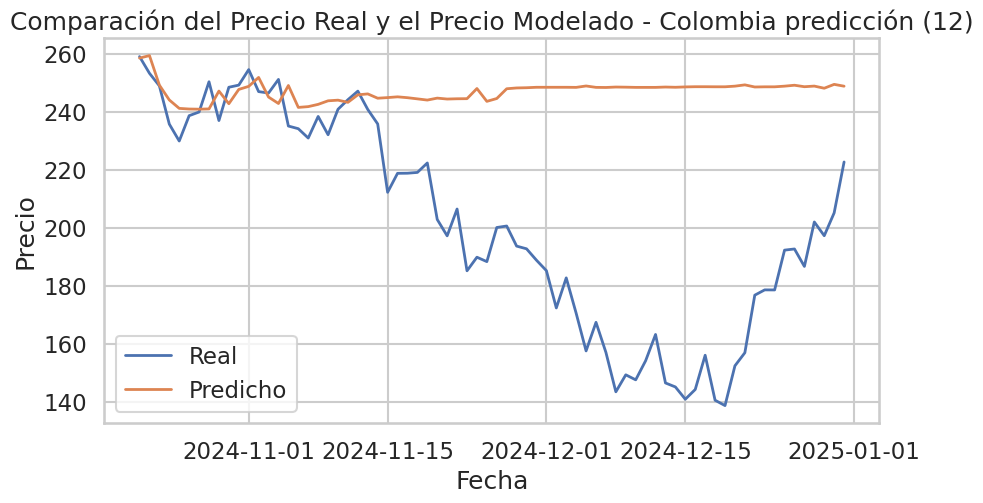


 Importancia de las variables en el modelo:


,Importancia
lag_1,0.966688
Precipitaciones_lag1,0.004824
Combustibles,0.004793
dayofyear,0.004228
lag_7,0.003839
Combustibles_lag1,0.003481
Embalses,0.003385
Precipitaciones,0.002829
Embalses_lag1,0.002817
rolling_mean_7,0.002688


In [19]:

# MODELO PREDICTIVO

# Librerías necesarias
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# Copia y preparación de datos
df_model = df_col[["Fecha","Valor","Embalses","Combustibles","Precipitaciones"]].copy()

# Rellenar NaN antes de crear lags
for col in ["Embalses","Combustibles","Precipitaciones"]:
    df_model[col] = df_model[col].fillna(0)

# Crear variables de tiempo y rezagos
df_model["lag_1"] = df_model["Valor"].shift(1)
df_model["lag_7"] = df_model["Valor"].shift(7)
df_model["rolling_mean_7"] = df_model["Valor"].rolling(7).mean().shift(1)
df_model["month"] = df_model["Fecha"].dt.month
df_model["dayofyear"] = df_model["Fecha"].dt.dayofyear

for v in ["Embalses","Combustibles","Precipitaciones"]:
    df_model[f"{v}_lag1"] = df_model[v].shift(1)

# Eliminar filas vacías tras generar variables
df_model = df_model.dropna().reset_index(drop=True)

if len(df_model) < 10:
    raise SystemExit(" Datos insuficientes después de generar lags/rolling. Necesitas más filas para entrenar.")

# Seleccionar variables
feature_cols = [c for c in df_model.columns if c not in ["Fecha","Valor"]]
X = df_model[feature_cols].astype(float)
y = df_model["Valor"].astype(float)

# División de entrenamiento y prueba (80%-20%)
split = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# Escalado
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train_s, y_train)
y_pred = model.predict(X_test_s)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f"\n MÉTRICAS DEL MODELO ({pais_nombre})")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")
print(f"MAPE: {mape:.2f}%")

# Validación cruzada (5 folds)
cv = KFold(n_splits=5, shuffle=False)
cv_scores = cross_val_score(model, X_train_s, y_train, cv=cv, scoring='r2')
print(f"R² promedio (5-Fold CV): {cv_scores.mean():.3f}")

# Gráfico: Real vs Predicho
fechas_test = df_model["Fecha"].iloc[split:].reset_index(drop=True)
y_test_aligned = y_test.reset_index(drop=True)

plt.figure(figsize=(10,5))
plt.plot(fechas_test, y_test_aligned, label="Real", linewidth=2)
plt.plot(fechas_test, y_pred, label="Predicho", linewidth=2)
plt.title(f"Comparación del Precio Real y el Precio Modelado - {pais_nombre}")
plt.xlabel("Fecha"); plt.ylabel("Precio")
plt.legend(); plt.grid(True); plt.show()

# Importancia de variables
fi = pd.Series(model.feature_importances_, index=feature_cols)
fi = fi[fi > 0].sort_values(ascending=False)

print("\n Importancia de las variables en el modelo:")
display(
    fi.to_frame("Importancia")
    .style.set_properties(**{'text-align': 'center'})
    .set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'),
                                     ('background-color', '#e0f7fa'),
                                     ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '6px')]}
    ])
)


**Modelo predictivo y comparación internacional**

Este bloque de código permite comparar el comportamiento del precio de la energía eléctrica entre varios países a partir de archivos CSV cargados por el usuario.

Combina la información en un solo conjunto, calcula medidas como la volatilidad y genera gráficos y tablas resumen para visualizar las diferencias en precios y variaciones entre países.

**Exportación de resultados procesados**

 Sube tus archivos CSV  de los diferentes países para la comparación ...


Saving Argentina.csv to Argentina (1).csv
Saving Colombia.csv to Colombia (6).csv
Saving España.csv to España.csv

 Tabla resumen de precios y volatilidad por país:



,País,Promedio_Precio,Precio_Máximo,Precio_Mínimo,Volatilidad_Promedio
0,Argentina,0.0745,0.10,0.05,0.0140
1,Colombia,0.1405,0.18,0.10,0.0223
2,España,0.2001,0.25,0.15,0.0281


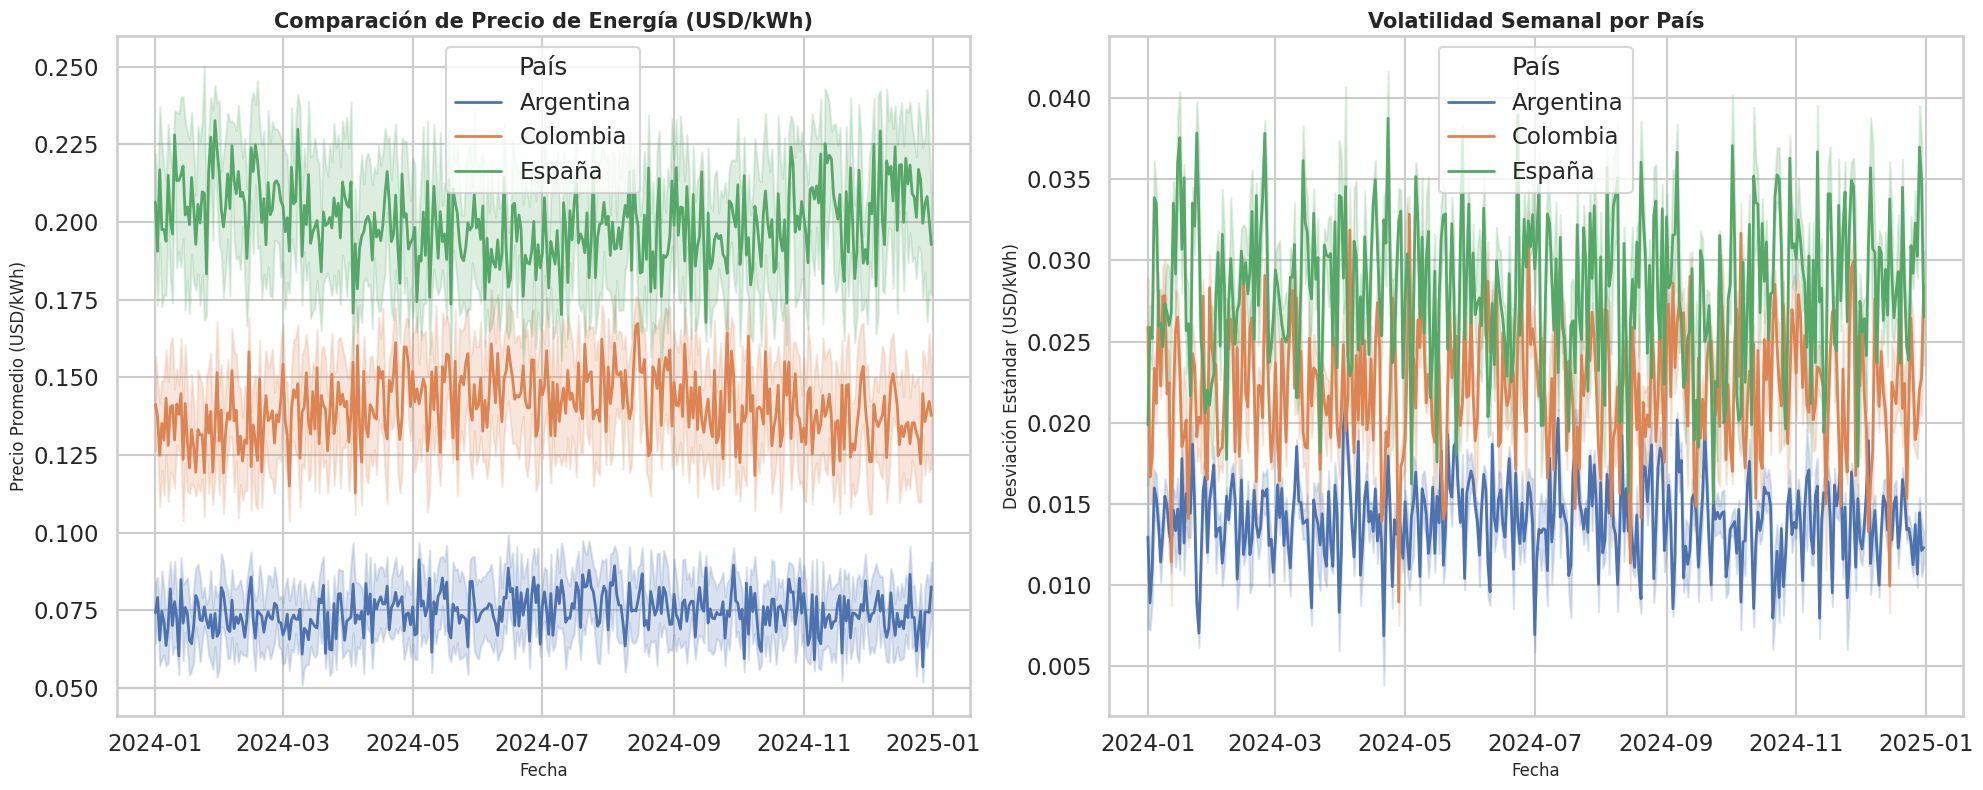


 Archivo 'resumen_precios_volatilidad.csv' guardado con éxito.


In [15]:
# COMPARACIÓN DE PRECIOS DE ENERGÍA ENTRE PAÍSES (USD/kWh)

import re #módulo de expresiones regulares

# Subir archivos
print(" Sube tus archivos CSV  de los diferentes países para la comparación ...")
uploaded_intl = files.upload()

# Función para limpiar nombres
def limpiar_nombre(nombre):
    return re.sub(r"\s*\(\d+\)", "", nombre.replace(".csv", "")).strip()

# Cargar y limpiar archivos
dfs = {}

for name, content in uploaded_intl.items():
    pais = limpiar_nombre(name)
    tmp = pd.read_csv(io.BytesIO(content), engine="python")

    # Normalizar nombres de columnas
    tmp.columns = [c.strip().replace("\ufeff", "") for c in tmp.columns]

    # Detectar columna de valor
    if "Valor" not in tmp.columns:
        for c in ["Precio", "precio", "PPBO", "Price"]:
            if c in tmp.columns:
                tmp.rename(columns={c: "Valor"}, inplace=True)
                break

    # Detectar columna de fecha
    if "Fecha" not in tmp.columns:
        for c in ["fecha", "Date", "date"]:
            if c in tmp.columns:
                tmp.rename(columns={c: "Fecha"}, inplace=True)
                break

    tmp["País"] = pais
    tmp["Fecha"] = pd.to_datetime(tmp["Fecha"], errors="coerce")
    tmp = tmp.dropna(subset=["Fecha", "Valor"])

    dfs[pais] = tmp[["Fecha", "Valor", "País"]]

# Unir todos los países
df_global = pd.concat(dfs.values(), ignore_index=True).drop_duplicates()

# Asegurar formato numérico
df_global["Valor"] = pd.to_numeric(df_global["Valor"], errors="coerce")

#  CALCULAR VOLATILIDAD (ROLLING 7 DÍAS)
df_global["Volatilidad"] = df_global.groupby("País")["Valor"].transform(
    lambda x: x.rolling(7, min_periods=1).std()
)

# Tabla de Comparación
tabla_resumen = (
    df_global.groupby("País")
    .agg(
        Promedio_Precio=("Valor", "mean"),
        Precio_Máximo=("Valor", "max"),
        Precio_Mínimo=("Valor", "min"),
        Volatilidad_Promedio=("Volatilidad", "mean")
    )
    .reset_index()
)

tabla_resumen = tabla_resumen.round(4)

print("\n Tabla resumen de precios y volatilidad por país:\n")
display(tabla_resumen)

# Graficar
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico 1: Precio Spot Comparado
sns.lineplot(data=df_global, x="Fecha", y="Valor", hue="País", ax=axes[0], linewidth=2)
axes[0].set_title("Comparación de Precio de Energía (USD/kWh)", fontsize=15, fontweight="bold")
axes[0].set_xlabel("Fecha", fontsize=12)
axes[0].set_ylabel("Precio Promedio (USD/kWh)", fontsize=12)
axes[0].legend(title="País")

# Gráfico 2: Volatilidad Semanal
sns.lineplot(data=df_global, x="Fecha", y="Volatilidad", hue="País", ax=axes[1], linewidth=2)
axes[1].set_title("Volatilidad Semanal por País", fontsize=15, fontweight="bold")
axes[1].set_xlabel("Fecha", fontsize=12)
axes[1].set_ylabel("Desviación Estándar (USD/kWh)", fontsize=12)
axes[1].legend(title="País")

plt.tight_layout()
plt.show()

# Guardar Tabla
tabla_resumen.to_csv("resumen_precios_volatilidad.csv", index=False)
print("\n Archivo 'resumen_precios_volatilidad.csv' guardado con éxito.")


**Análisis Gráfico:** La gráfica izquierda muestra la evolución del precio promedio diario de la energía (USD/kWh) para España, Colombia y Argentina durante el periodo analizado.
Se observa que España mantiene los precios más altos, con valores cercanos a 0.20 USD/kWh, Colombia presenta un nivel intermedio alrededor de 0.14 USD/kWh, mientras que Argentina refleja los precios más bajos (≈ 0.075 USD/kWh), asociados a subsidios y control tarifario estatal.

La gráfica derecha representa la volatilidad semanal del precio (desviación estándar), que indica el grado de fluctuación o riesgo del mercado.
En ella, España evidencia la mayor volatilidad, influenciada por los costos del gas y las condiciones del mercado europeo; Colombia muestra una volatilidad moderada, relacionada con factores climáticos e hídricos; y Argentina mantiene la mayor estabilidad, producto de su regulación gubernamental.

En conjunto, las gráficas evidencian que España presenta el mayor costo y riesgo, Colombia una posición intermedia, y Argentina el menor costo y riesgo energético.

**Exportación y Compresión de Resultados**

Este bloque guarda y comprime los archivos finales del análisis.
Genera tres salidas:

- Un archivo CSV con los datos procesados del país analizado.

- Un archivo CSV con los datos globales comparados.

- Un archivo ZIP que contiene ambos para facilitar su descarga o compartición.

In [ ]:
df_col.to_csv(f"/content/{pais_nombre}_procesado.csv", index=False)
df_global.to_csv("/content/Precios_Globales.csv", index=False)
zip_path = "/content/datos_proyecto_precios.zip"
with zipfile.ZipFile(zip_path, "w") as z:
    z.write(f"/content/{pais_nombre}_procesado.csv", arcname=f"{pais_nombre}_procesado.csv")
    z.write("/content/Precios_Globales.csv", arcname="Precios_Globales.csv")
print("Archivos generados:")
print(f"/content/{pais_nombre}_procesado.csv")
print("/content/Precios_Globales.csv")
print("/content/datos_proyecto_precios.zip")


**Verificación de archivos subidos**

In [ ]:
# Lista los archivos que subiste
if 'uploaded' in locals() and uploaded:
    print("Archivos subidos:")
    for filename in uploaded.keys():
        print(f"- {filename}")

else:
    print(" No se encontró ningún archivo subido. Por favor, sube un archivo CSV primero.")

**Comparación anual de precios promedio por país**

Este bloque genera un gráfico de barras que muestra el precio promedio anual de la energía para cada país.

Primero, agrupa los datos por país y año, calcula el promedio de precios, y luego crea un gráfico de barras colorido para visualizar las diferencias.
Permite observar fácilmente qué países tuvieron precios más altos o bajos cada año y comparar su comportamiento energético de forma visual y clara.

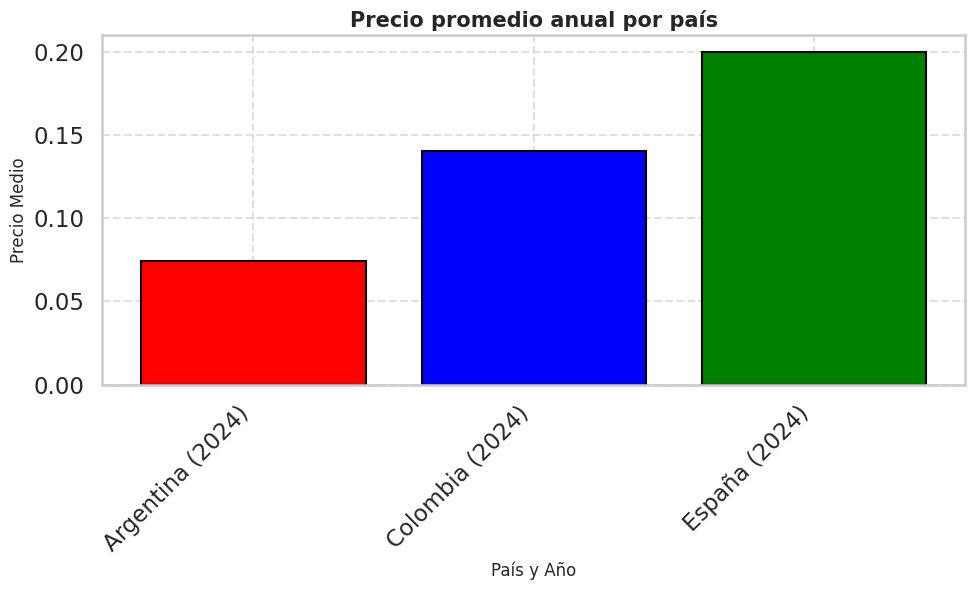

In [17]:
# Gráfico de barras
df_global["Año"] = df_global["Fecha"].dt.year
prom = df_global.groupby(["País","Año"])["Valor"].mean().reset_index()

# Crear lista de colores primarios y secundarios
colores = [
    "#FF0000",  # rojo
    "#0000FF",  # azul
    "#008000",  # verde
    "#FFA500",  # naranja
    "#800080",  # morado
    "#00CED1",  # turquesa
    "#FFD700",  # dorado
    "#FF1493",  # fucsia
    "#A52A2A",  # marrón
    "#808080"   # gris
]

# Repetir colores si hay más barras que colores disponibles
while len(colores) < len(prom):
    colores = colores * 2

plt.figure(figsize=(10,6))
bars = plt.bar(
    range(len(prom)),
    prom["Valor"],
    color=colores[:len(prom)],
    edgecolor="black"
)

# Etiquetas de países/años en el eje X
plt.xticks(range(len(prom)), prom["País"] + " (" + prom["Año"].astype(str) + ")", rotation=45, ha="right")

plt.title("Precio promedio anual por país", fontsize=15, fontweight="bold")
plt.ylabel("Precio Medio", fontsize=12)
plt.xlabel("País y Año", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




**Conclusión**

La aplicación en Python se desarrolló con el propósito de analizar y predecir el comportamiento del precio spot de la energía eléctrica, integrando en un solo entorno herramientas de procesamiento de datos, visualización y modelado predictivo. Su estructura permite cargar o descargar datos reales, limpiarlos, graficar la evolución del precio y su volatilidad, y aplicar un modelo de aprendizaje automático para estimar valores futuros a partir de variables como embalses, combustibles y precipitaciones. En esencia, la aplicación consiste en un sistema flexible y automatizado que facilita el estudio comparativo del mercado energético, proporcionando resultados visuales, métricos y analíticos que apoyan la comprensión del comportamiento del precio de la energía en distintos contextos.